In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    log_loss
)

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [6]:
df=pd.read_csv('/content/SILKYSKY_DATA_CW1 (S).csv', encoding='latin1')
df.head(5)

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,Continent,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,Asia,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,Europe,0,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,Asia,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,Europe,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,Asia,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [7]:
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (103904, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wi

In [8]:
missing = df.isna().sum()
print("Missing values:\n", missing[missing > 0])

print("Duplicate rows:", df.duplicated().sum())


Missing values:
 Arrival Delay in Minutes    310
dtype: int64
Duplicate rows: 0


In [9]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(
    df['Arrival Delay in Minutes'].median()
)


In [10]:
df['Satisfied'] = df['Satisfied'].map({'Y': 1, 'N': 0})

In [11]:
df_model = df.drop(columns=['Ref', 'id'])

In [12]:
categorical_cols = df_model.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

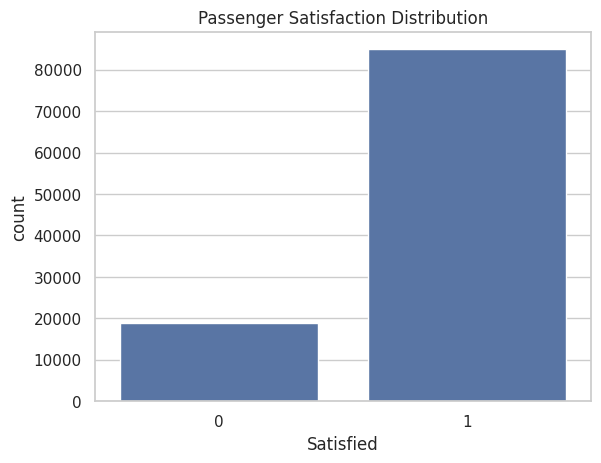

In [13]:
sns.countplot(x='Satisfied', data=df)
plt.title("Passenger Satisfaction Distribution")
plt.show()

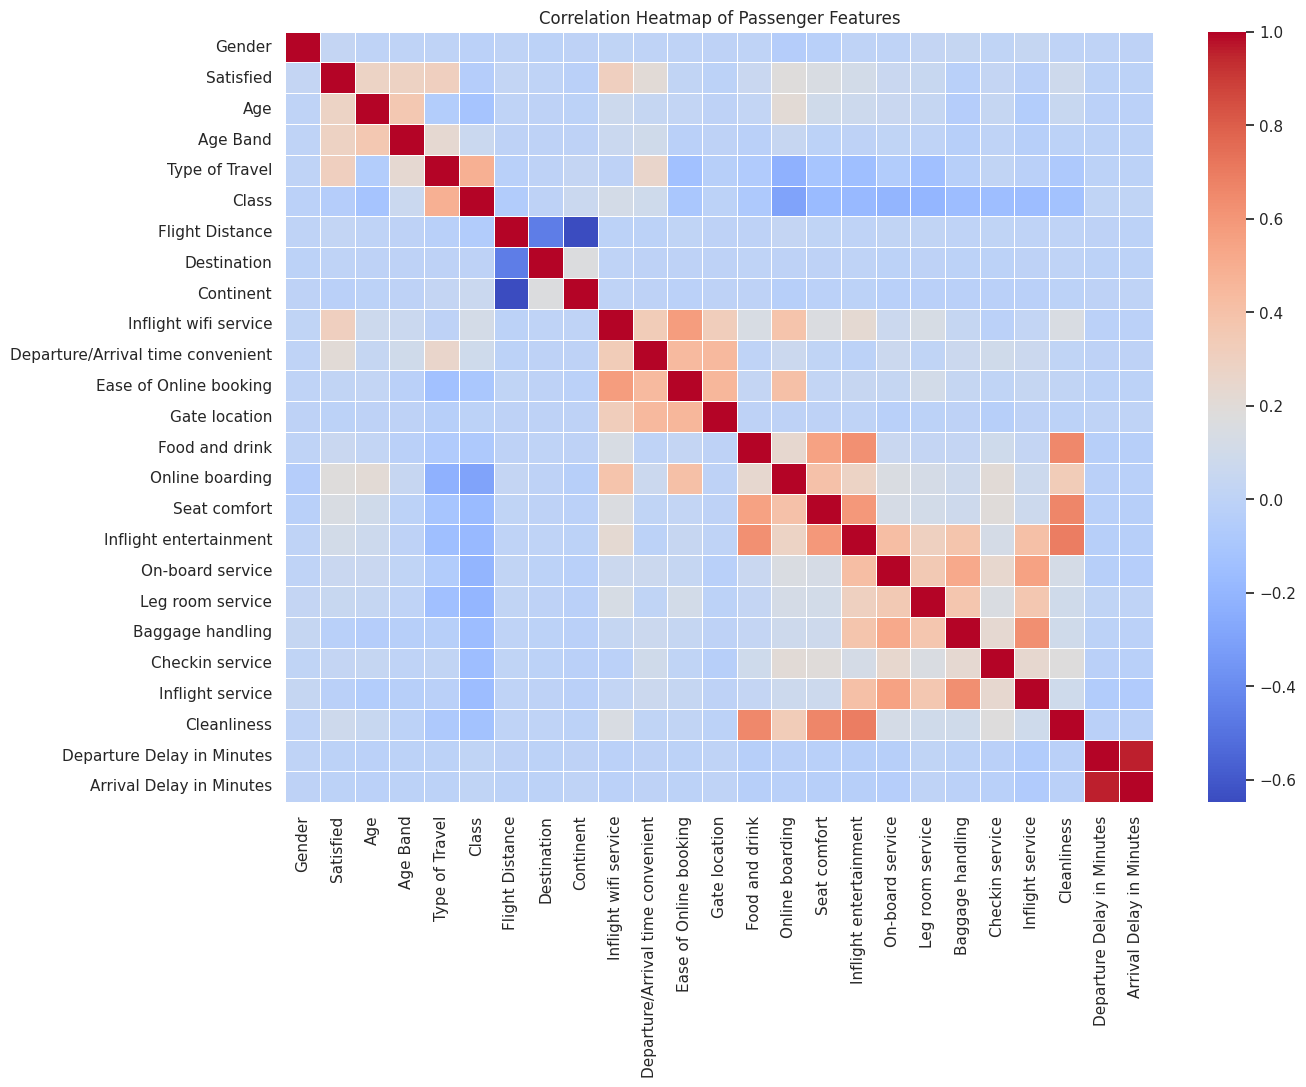

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(df_model.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Passenger Features")
plt.show()

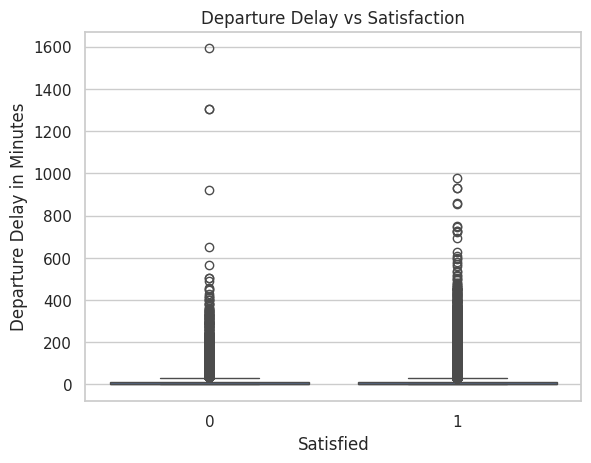

In [15]:
sns.boxplot(x='Satisfied', y='Departure Delay in Minutes', data=df)
plt.title("Departure Delay vs Satisfaction")
plt.show()

In [16]:
X = df_model.drop(columns=['Satisfied'])
y = df_model['Satisfied']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)

In [19]:
print("Logistic Regression Performance")
print(classification_report(y_test, y_pred_log))
print("Log Loss:", log_loss(y_test, y_prob_log))

Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.78      0.68      0.73      3797
           1       0.93      0.96      0.94     16984

    accuracy                           0.91     20781
   macro avg       0.85      0.82      0.83     20781
weighted avg       0.90      0.91      0.90     20781

Log Loss: 0.23206774125887766


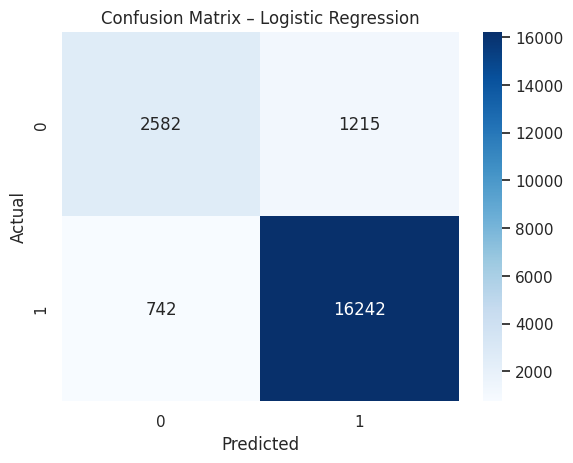

In [20]:
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [21]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)

In [22]:
print("Random Forest Performance")
print(classification_report(y_test, y_pred_rf))
print("Log Loss:", log_loss(y_test, y_prob_rf))

Random Forest Performance
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3797
           1       0.99      1.00      0.99     16984

    accuracy                           0.99     20781
   macro avg       0.99      0.98      0.98     20781
weighted avg       0.99      0.99      0.99     20781

Log Loss: 0.061029126389988086


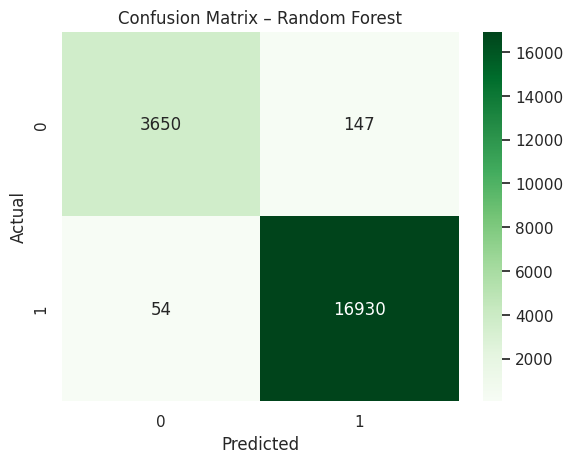

In [23]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

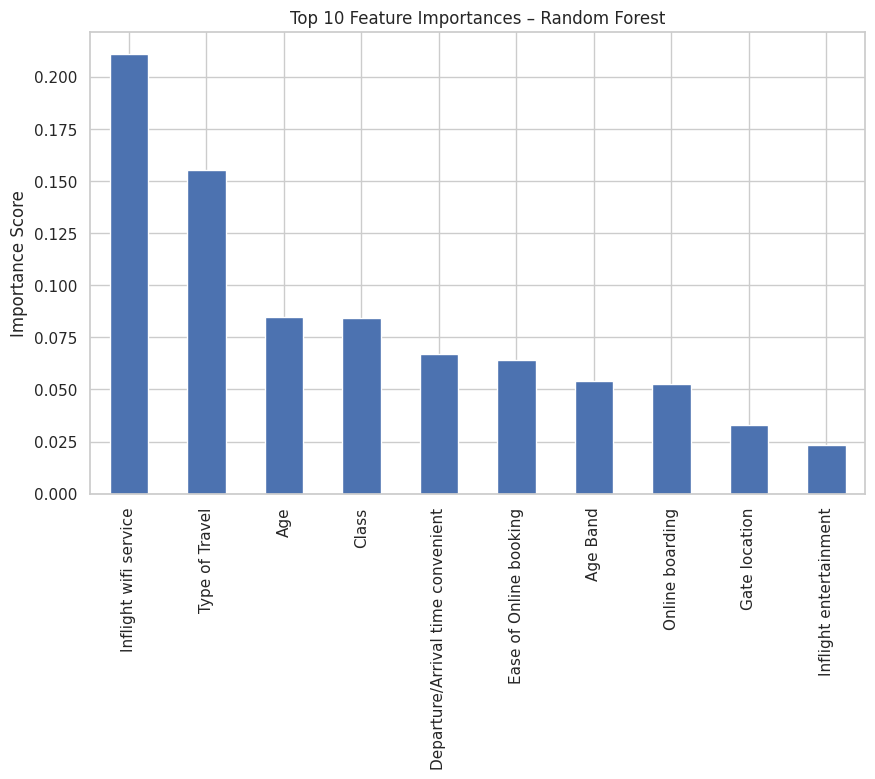

In [24]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances – Random Forest")
plt.ylabel("Importance Score")
plt.show()

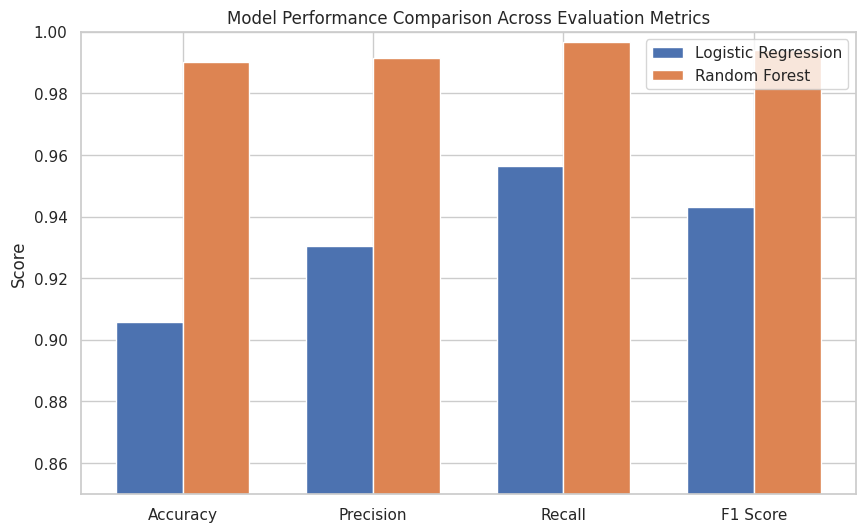

In [28]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ]
})

comparison


metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_scores = comparison.loc[0, metrics]
rf_scores = comparison.loc[1, metrics]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))

plt.bar(x - width/2, log_scores, width, label='Logistic Regression')
plt.bar(x + width/2, rf_scores, width, label='Random Forest')

plt.xticks(x, metrics)
plt.ylim(0.85, 1.0)
plt.ylabel('Score')
plt.title('Model Performance Comparison Across Evaluation Metrics')
plt.legend()

plt.show()



In [26]:
mock_passenger = X_test.iloc[[0]].copy()

rf_prediction = rf_model.predict(mock_passenger)
rf_probability = rf_model.predict_proba(mock_passenger)

print("Predicted Satisfaction (1=Yes, 0=No):", rf_prediction[0])
print("Prediction Probabilities [Unsatisfied, Satisfied]:", rf_probability[0])


Predicted Satisfaction (1=Yes, 0=No): 0
Prediction Probabilities [Unsatisfied, Satisfied]: [0.965 0.035]
